<div style="text-align: center; background-color: #bd4f0a; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  ĐẶT VẤN ĐỀ VÀ GIẢI QUYẾT
</div>

### Thông tin nhóm:

<center>

| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Nguyễn Đức Mạnh    | 20120019  |
| Nguyễn Văn Hiến    | 22120101  |
| Đặng Minh Hoàng       | 22120110  |
| Nguyễn Ngọc Hoàng     | 22120112  |
| Quách Tề Hoằng     | 22120114  |

</center>


### Giảng viên hướng dẫn: 
##### **Thầy Lê Nhựt Nam**
##### **Thầy Lê Ngọc Thành**
---

## Nội dung <a id="content"></a>
1. [Chuẩn bị dữ liệu](#reparation) <br>
    1.1 [Khai báo thư viện](#library) <br>
    1.2 [Tải dữ liệu](#load) <br>

2. [Phân khúc khách hàng](#segment)  
    2.1 [Câu hỏi 1](#2-question-1) <br>
    2.2 [Câu hỏi 2](#2-question-2) <br>

3. [Xu hướng thị trường](#trend)  
    3.1 [Câu hỏi 1](#3-question-1) <br>
    3.2 [Câu hỏi 2](#3-question-2) <br>
    
4. [Tiện nghi - Tiện ích](#convenience) <br>
    4.1 [Câu hỏi 1](#4-question-1) <br>
    4.2 [Câu hỏi 2](#4-question-2)<br>
    4.3 [Câu hỏi 3](#4-question-3) <br>

## 1. Chuẩn bị dữ liệu <a id="reparation"></a>
###### [(Về trang đầu)](#content)

### 1.1. Khai báo thư viện <a id="library"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.2. Tải dữ liệu <a id="load"></a>

In [2]:
df = pd.read_csv("./Data/DSPhongTro_DaXuLy.csv", encoding='utf-8-sig', sep='\t')
df.head()

,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
0,16,20.0,1.0,1.0,2,4.0,2024-10-22
1,16,60.0,2.0,2.0,0,10.0,2024-10-23
2,3,45.0,1.0,1.0,0,7.3,2024-10-23
3,2,30.0,1.0,1.0,2,4.1,2024-10-17
4,19,28.0,1.0,1.0,0,2.8,2024-10-23


#### Bảng ánh xạ

In [3]:
mapping = {
    1: "Quận 1", 2: "Quận 2", 3: "Quận 3", 4: "Quận 4", 5: "Quận 5", 6: "Quận 6",
    7: "Quận 7", 8: "Quận 8", 9: "Quận 9", 10: "Quận 10", 11: "Quận 11", 12: "Quận 12",
    13: "Bình Thạnh", 14: "Gò Vấp", 15: "Phú Nhuận", 16: "Tân Bình", 17: "Tân Phú",
    18: "Bình Tân", 19: "Thủ Đức", 20: "Bình Chánh", 21: "Cần Giờ",
    22: "Củ Chi", 23: "Hóc Môn", 24: "Nhà Bè"
}
mapping_noi_that = {0: "Không", 1: "Cơ bản", 2: "Đầy đủ", 3: "Cao cấp"}

## 2. Phân khúc khách hàng <a id="trend"></a>

### 2.1. Liệu mức giá thuê có thay đổi như thế nào giữa các khu vực (Địa chỉ) và diện tích phòng, và phân khúc khách hàng nào thường chọn phòng có diện tích lớn hoặc nhỏ ở mỗi khu vực đó? <a id="3-question-1"></a>
###### [(Về trang đầu)](#content)

##### Ý nghĩa của việc trả lời câu hỏi

- Trả lời câu hỏi này giúp xác định mối quan hệ giữa vị trí (Địa chỉ), diện tích và mức giá thuê. Việc phân tích này có thể làm rõ các khu vực có mức giá phòng cao hay thấp, đồng thời nhận diện được các phân khúc khách hàng nào ưa thích các loại phòng có diện tích lớn hoặc nhỏ, từ đó tối ưu hóa chiến lược marketing hoặc phân phối phòng trọ.

##### Phân tích hướng xử lí

- Các bước thực hiện:
    + Phân nhóm dữ liệu theo Địa chỉ (khu vực) và Diện tích.
    + Tính toán mức giá trung bình theo mỗi khu vực và diện tích.
    + Phân tích mối quan hệ giữa giá và diện tích trong từng khu vực để thấy được xu hướng thuê của khách hàng.
- Kết quả mong đợi:
    + Xác định các phân khúc khách hàng và các khu vực có mức giá thuê phù hợp với diện tích phòng.
    + Đưa ra dự báo về nhu cầu của khách hàng ở từng khu vực, từ đó tối ưu hóa chiến lược cho thuê.

##### Tiền xử lí

In [4]:
data_Q1 = df[['Địa chỉ', 'Diện tích', 'Mức giá']].copy()
data_Q1['Địa chỉ'] = data_Q1['Địa chỉ'].map(mapping)
data_Q1['Nhóm diện tích'] = np.where(data_Q1['Diện tích'] < 20, 'Nhỏ', np.where(data_Q1['Diện tích'] < 40, 'Vừa', 'Lớn'))
desired_order_Q1 = ['Nhỏ', 'Vừa', 'Lớn']

##### Phân tích để trả lời câu hỏi

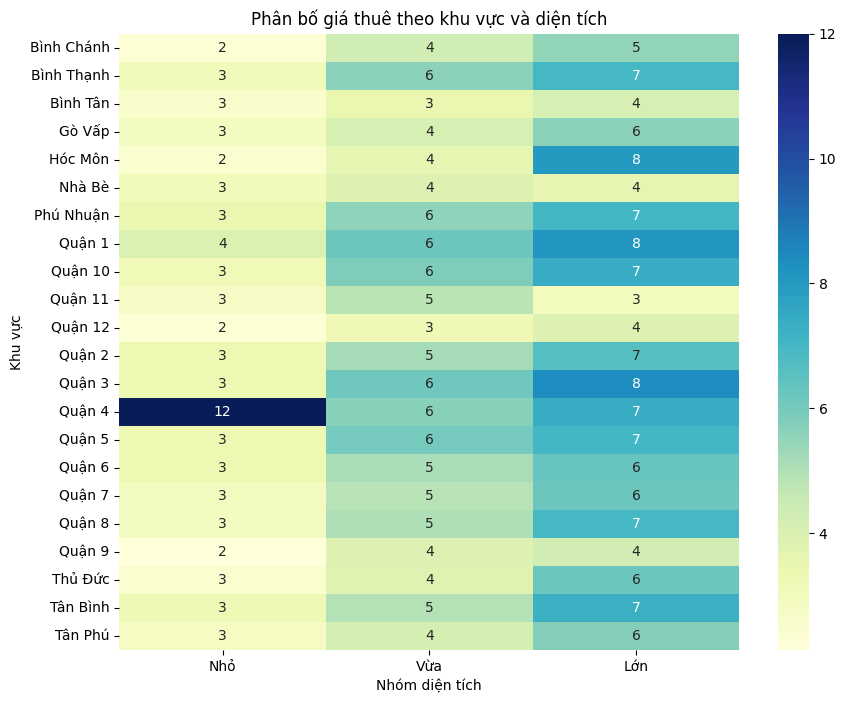

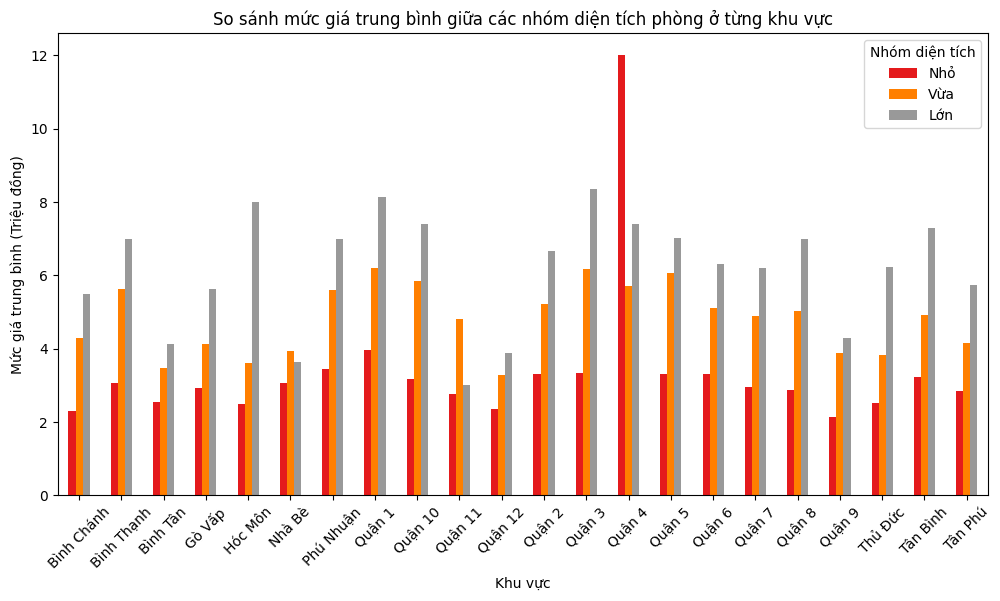

In [5]:
pivot = data_Q1.pivot_table(values='Mức giá', index='Địa chỉ', columns='Nhóm diện tích', aggfunc='mean')
pivot = pivot[desired_order_Q1]  # Đặt lại thứ tự cột theo danh sách mong muốn

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Phân bố giá thuê theo khu vực và diện tích')
plt.xlabel('Nhóm diện tích')
plt.ylabel('Khu vực')
plt.show()

# Tính giá trung bình
avg_price = data_Q1.groupby(['Địa chỉ', 'Nhóm diện tích'])['Mức giá'].mean().unstack()
avg_price = avg_price[desired_order_Q1]
avg_price.plot(kind='bar', figsize=(12, 6), colormap='Set1')
plt.title('So sánh mức giá trung bình giữa các nhóm diện tích phòng ở từng khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Mức giá trung bình (Triệu đồng)')
plt.legend(title='Nhóm diện tích')
plt.xticks(rotation=45)
plt.show()

**Các nhóm mức giá**
- **Mức giá rất thấp:** < 3 triệu đồng / tháng
- **Mức giá thấp:** từ 3 - 4.5 triệu đồng / tháng
- **Mức giá vừa:** từ 4.5 - 6 triệu đồng / tháng
- **Mức giá cao:**  > 6.5 triệu đồng / tháng

Từ biều đồ chúng ta có thể thấy:
- Đối với nhóm diện tích nhỏ thì chúng ta có thể thấy mức giá ở các khu vực chia làm 3 mức:
    + Mức giá rất thấp: Bình Chánh, Cần Giờ, Củ Chi, Quận 12, Thủ Đức, Tân Bình, Quận 7, Quận 8, Thủ Đức, Tân Bình
    + Mức giá thấp: Các khu vực còn lại (trừ Quận 4)
    + Riêng quận 4 có mức giá rất lớn => Có khả năng thông tin bất thường, cần kiểm tra lại dữ liệu. Nếu hợp lý, nhóm này có thể hướng đến người trẻ tuổi, nhân viên văn phòng có thu nhập cao, muốn ở gần trung tâm thành phố.
- Đối với nhóm diện tích vừa thì chúng ta có thể thấy rõ mức giá ở các khu vực chia làm 3 mức:
    + Mức giá thấp: Bình Chánh, Cần Giờ, Củ Chi, Quận 12, Thủ Đức, Tân Bình, Gò Vấp
    + Mức giá vừa: Các khu vực còn lại
- Đối với nhóm diện tích lớn: Chúng ta có thể thấy mức giá ở các khu vực cũng chia làm 3 mức:
    + Mức giá thấp: Bình Chánh, Gò Vấp, Quận 11, Quận 12
    + Mức giá vừa: Cần Giờ, Củ Chi, Quận 6, Quận 7, Thủ Đức, Tân Bình
    + Mức giá cao: Các khu vực còn lại

**Kiểm tra lại thông tin các phòng trọ có diện tích nhỏ ở quận 4**

1. Lấy thông tin các phòng trọ có diện tích nhỏ ở quận 4

In [6]:
check = data_Q1[(data_Q1['Địa chỉ'] == 'Quận 4') & (data_Q1['Nhóm diện tích'] == 'Nhỏ')].copy()
check

,Địa chỉ,Diện tích,Mức giá,Nhóm diện tích
3316,Quận 4,10.0,12.0,Nhỏ


2. Xác minh dữ liệu

In [7]:
raw_data = pd.read_csv('./Data/DSPhongTro.csv', sep='\t')

for i in range(len(check)):
    # Lấy giá trị từ dòng hiện tại của DataFrame 'check'
    dia_chi_check = f'{check.iloc[i]['Địa chỉ']}'
    dien_tich_check = check.iloc[i]['Diện tích']
    muc_gia_check = f'{check.iloc[i]['Mức giá']}'

    # Lọc dữ liệu dựa trên các điều kiện
    result = raw_data[
        (raw_data['Địa chỉ'].str.contains(dia_chi_check, na=False)) &  # Kiểm tra chuỗi con
        (raw_data['Diện tích'] == dien_tich_check) & 
        (raw_data['Mức giá'] == muc_gia_check)
    ]

    # In ra cột 'Link' của các dòng khớp
    print(result['Link'].values)


['https://batdongsan.com.vn/cho-thue-nha-tro-phong-tro-duong-xom-chieu-phuong-16/cho-2pn-12-trieu-10m2-tai-q4-hcm-gia-tot-pr41690954']


- Sau khi kiểm tra chi tiết từ link của dòng dữ liệu bất thường, xác nhận rằng đây là một căn nhà trọ, không phải phòng trọ => loại bỏ dòng dữ dữ liệu này

3. Loại bỏ dòng dữ liệu bất thường


In [8]:
print('kích thước dữ liệu ban đầu:', df.shape)
df = df.drop(check.index)
print('kích thước dữ liệu sau khi xóa:', df.shape)

kích thước dữ liệu ban đầu: (4600, 7)
kích thước dữ liệu sau khi xóa: (4599, 7)


In [9]:
#Lưu lại dữ liệu sau khi đã xóa
df.to_csv('./Data/DSPhongTro_DaXuLy.csv', sep='\t', index=False)

**Trực quan hóa lại dữ liệu sau khi đã xử lí**

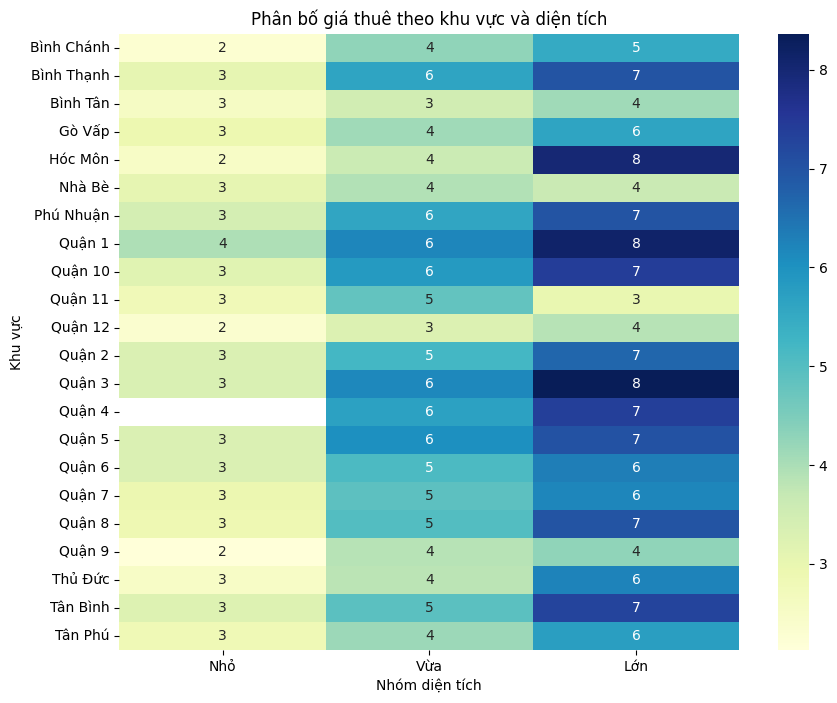

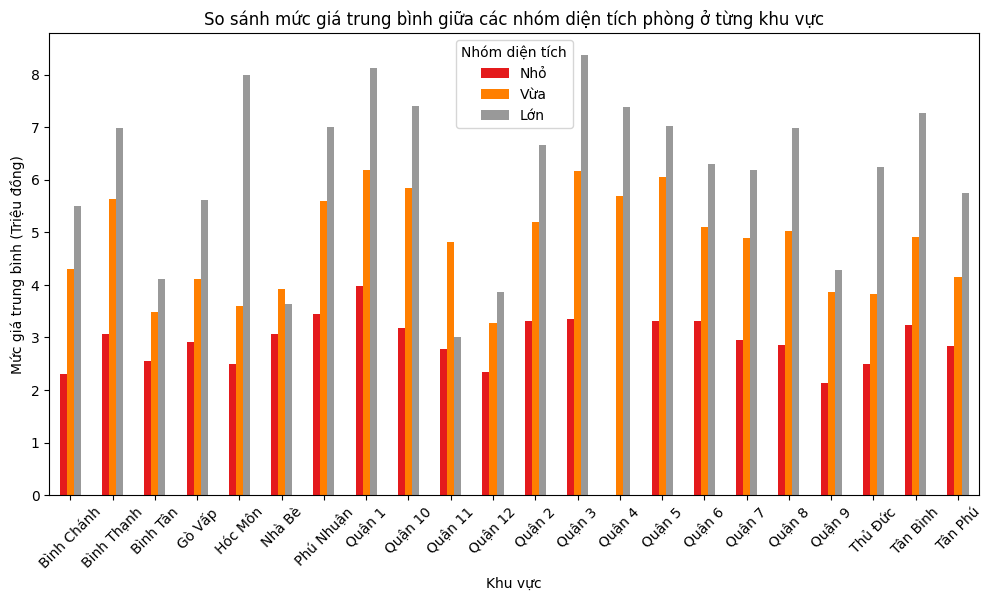

In [10]:
df = pd.read_csv('./Data/DSPhongTro_DaXuLy.csv', sep='\t')

#tiền xử lí dữ liệu
data_Q1 = df[['Địa chỉ', 'Diện tích', 'Mức giá']].copy()
data_Q1['Địa chỉ'] = data_Q1['Địa chỉ'].map(mapping)
data_Q1['Nhóm diện tích'] = np.where(data_Q1['Diện tích'] < 20, 'Nhỏ', np.where(data_Q1['Diện tích'] < 40, 'Vừa', 'Lớn'))
desired_order_Q1 = ['Nhỏ', 'Vừa', 'Lớn']

#Trực quan hóa dữ liệu
pivot = data_Q1.pivot_table(values='Mức giá', index='Địa chỉ', columns='Nhóm diện tích', aggfunc='mean')
pivot = pivot[desired_order_Q1]  # Đặt lại thứ tự cột theo danh sách mong muốn

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Phân bố giá thuê theo khu vực và diện tích')
plt.xlabel('Nhóm diện tích')
plt.ylabel('Khu vực')
plt.show()

# Tính giá trung bình
avg_price = data_Q1.groupby(['Địa chỉ', 'Nhóm diện tích'])['Mức giá'].mean().unstack()
avg_price = avg_price[desired_order_Q1]
avg_price.plot(kind='bar', figsize=(12, 6), colormap='Set1')
plt.title('So sánh mức giá trung bình giữa các nhóm diện tích phòng ở từng khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Mức giá trung bình (Triệu đồng)')
plt.legend(title='Nhóm diện tích')
plt.xticks(rotation=45)
plt.show()

Từ biểu đồ chúng ta có thể thấy:
- Trước khi xử lý: Nhóm diện tích nhỏ tại khu vực Quận 4 có mức giá rất cao, không hợp lý so với các khu vực khác trong cùng nhóm.
- Sau khi xử lý: Dữ liệu cho thấy Quận 4 không có phòng trọ thuộc nhóm diện tích nhỏ. Điều này phản ánh thực tế rằng khu vực này có thể không cung cấp loại hình phòng trọ diện tích nhỏ, hoặc giá thuê rất cao dẫn đến không có nhu cầu phù hợp trong nhóm này.

##### Kết luận:

Phân khúc khách hàng theo diện tích và mức giá
- Nhóm diện tích nhỏ:
    + Mức giá rất thấp: Các khu vực như Bình Chánh, Cần Giờ, Củ Chi, Quận 12, Thủ Đức, Tân Bình, Quận 7, Quận 8.
        * Khách hàng: Sinh viên, người lao động thu nhập thấp, hoặc người độc thân cần chỗ ở tạm thời.
        * Đặc điểm: Yêu cầu cơ bản, ưu tiên giá rẻ và gần nơi làm việc/học tập.
    + Mức giá thấp: Các khu vực khác (trừ Quận 4).
        * Khách hàng: Nhân viên văn phòng hoặc gia đình nhỏ có thu nhập trung bình, muốn không gian vừa đủ với chi phí hợp lý.
    + Quận 4 (mức giá cao): Sau khi kiểm tra, khu vực Quận 4 không cung cấp loại phòng trọ diện tích nhỏ. Điều này phản ánh thực tế rằng khu vực này có thể tập trung vào các sản phẩm nhà ở cao cấp hơn, không phù hợp với nhu cầu nhóm diện tích nhỏ.
- Nhóm diện tích vừa:
    + Mức giá thấp: Các khu vực như Bình Chánh, Cần Giờ, Củ Chi, Quận 12, Thủ Đức, Tân Bình, Gò Vấp.
        * Khách hàng: Gia đình nhỏ hoặc nhân viên văn phòng muốn tiết kiệm chi phí nhưng vẫn cần không gian thoải mái.
        * Đặc điểm: Chấp nhận ở xa trung tâm để giảm chi phí.
    + Mức giá vừa: Các khu vực khác.
        * Khách hàng: Nhân viên văn phòng thu nhập khá, gia đình trẻ, hoặc người độc thân có nhu cầu sống tiện nghi.
        * Đặc điểm: Ưu tiên cân bằng giữa diện tích, giá cả và vị trí.
- Nhóm diện tích lớn:
    + Mức giá thấp: Các khu vực như Bình Chánh, Gò Vấp, Quận 11, Quận 12.
        * Khách hàng: Gia đình lớn hoặc nhóm người ở chung muốn tiết kiệm chi phí.
        * Đặc điểm: Thường chọn khu vực xa trung tâm để có mức giá hợp lý.
    + Mức giá vừa: Các khu vực như Cần Giờ, Củ Chi, Quận 6, Quận 7, Thủ Đức, Tân Bình.
        * Khách hàng: Gia đình trung lưu hoặc chuyên gia thu nhập khá.
        * Đặc điểm: Cần không gian rộng nhưng ưu tiên khu vực nội thành với tiện ích đầy đủ.
    + Mức giá cao: Các khu vực khác.
        * Khách hàng: Gia đình giàu có, khách hàng cao cấp, hoặc chuyên gia nước ngoài.
        * Đặc điểm: Yêu cầu không gian rộng, tiện nghi cao cấp, và vị trí trung tâm hoặc các khu vực có chất lượng sống cao.

Tóm tắt:
- Nhóm diện tích nhỏ:
    + Mức giá rất thấp: Sinh viên, người lao động thu nhập thấp ở các khu vực ngoại thành (Bình Chánh, Củ Chi, Thủ Đức,...).
    + Mức giá thấp: Nhân viên văn phòng hoặc gia đình nhỏ thu nhập trung bình.
    + Quận 4: Không có phòng trọ diện tích nhỏ sau xử lý, phản ánh nguồn cung hạn chế hoặc giá quá cao.
- Nhóm diện tích vừa:
    + Mức giá thấp: Gia đình nhỏ, nhân viên văn phòng ưu tiên tiết kiệm ở ngoại thành.
    + Mức giá vừa: Nhân viên văn phòng khá giả, gia đình trẻ, ưu tiên tiện nghi gần trung tâm.
- Nhóm diện tích lớn:
    + Mức giá thấp: Gia đình lớn, nhóm người ở chung tìm kiếm không gian rộng ở ngoại thành.
    + Mức giá vừa: Gia đình trung lưu, chuyên gia thu nhập khá, cần không gian thoải mái nội thành.
    + Mức giá cao: Gia đình giàu, chuyên gia nước ngoài, yêu cầu cao về tiện nghi và vị trí.

### 3.2. Có sự khác biệt nào về mức giá thuê giữa các phòng có nội thất và không có nội thất khi xét theo số phòng ngủ và số toilet, và phân khúc khách hàng nào có xu hướng chọn phòng có nội thất?   <a id="3-question-2"></a>
###### [(Về trang đầu)](#content)

##### Ý nghĩa của việc trả lời câu hỏi

- Xác định xu hướng khách hàng: Phân loại khách hàng theo nhu cầu chọn phòng có hoặc không có nội thất.
- Tối ưu chiến lược giá: Hiểu rõ mối quan hệ giữa nội thất, số phòng ngủ, số toilet và mức giá thuê để đưa ra mức giá hợp lý, thu hút đúng phân khúc khách hàng.
- Phân khúc khách hàng cụ thể: Nhóm khách hàng có xu hướng chọn phòng có nội thất thường thuộc phân khúc nào (thu nhập cao hơn, nhu cầu tiện nghi).

##### Phân tích hướng xử lí

- Các bước thực hiện:
    + Phân Nhóm theo Số phòng ngủ, Số toilet, và Nội thất.
    + Tính toán mức giá trung bình (mean) cho từng nhóm phòng (theo số phòng ngủ, số toilet, và nội thất)
    + Trực quan hóa dữ liệu
    + Phân tích xu hướng lựa chọn dựa trên mức giá trung bình và các tổ hợp phòng (Số phòng ngủ, Số toilet, Nội thất)
- Kết quả mong đợi:
    + Thấy được sự khác biệt về mức giá
    + Đưa ra dự báo về nhu cầu của khách hàng, từ đó tối ưu hóa chiến lược cho thuê.

##### Tiền xử lí

In [11]:
data_Q2 = df[['Mức giá', 'Nội thất', 'Số phòng ngủ', 'Số toilet']].copy()
data_Q2['Nội thất'] = data_Q2['Nội thất'].map(mapping_noi_that)
desired_order_Q2 = ['Không', 'Cơ bản', 'Đầy đủ', 'Cao cấp']
data_Q2['Nội thất'] = pd.Categorical(data_Q2['Nội thất'], categories=desired_order_Q2, ordered=True)

##### Phân tích và trả lời câu hỏi

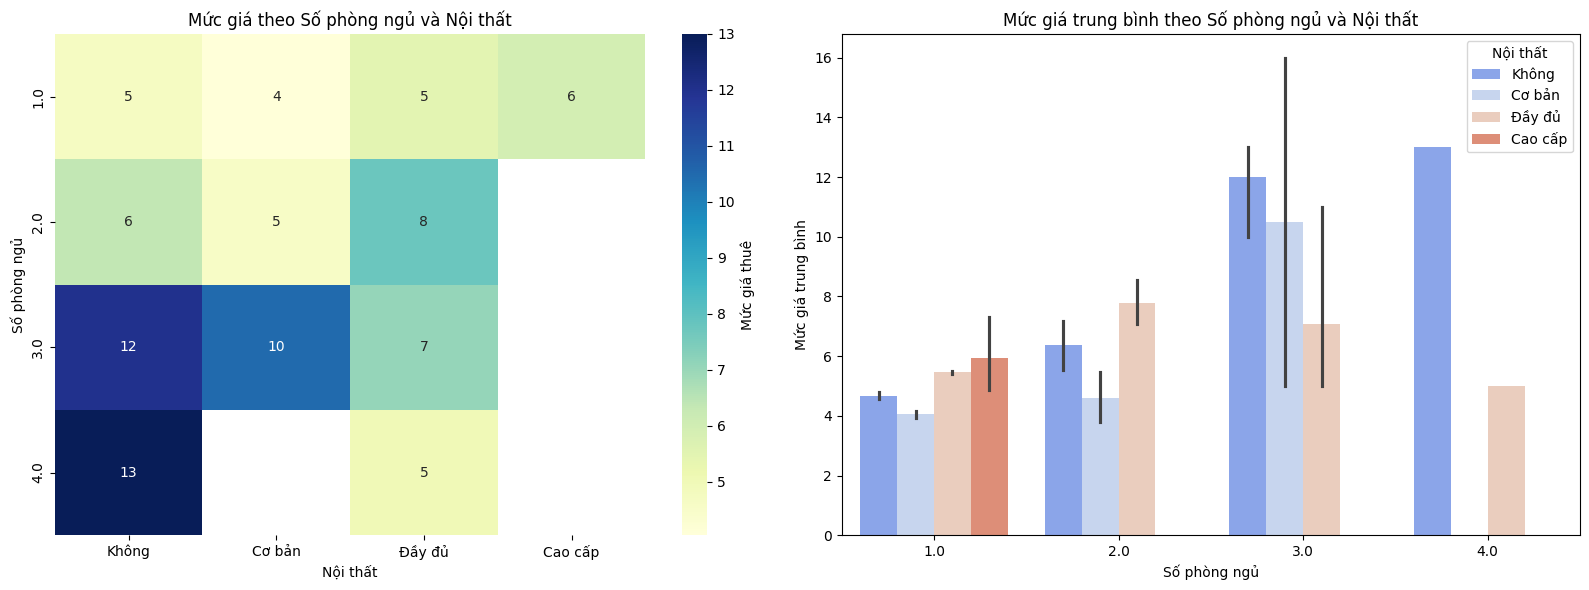

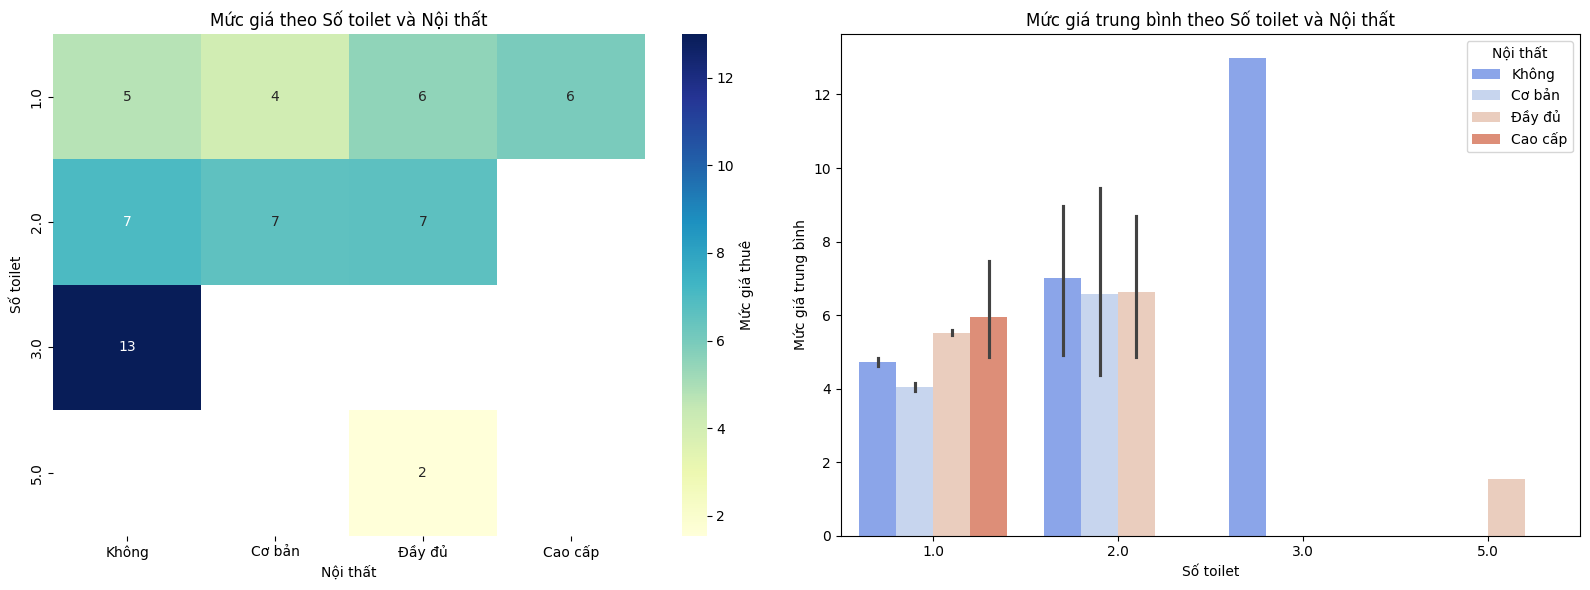

In [12]:
def plot_combined(data, name):
    # Tạo một figure với 2 cột, cột 1 cho Heatmap, cột 2 cho Bar plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # **Biểu đồ Heatmap (Bên trái)**
    pivot = data.pivot_table(values='Mức giá', index=name, columns='Nội thất', aggfunc='mean', observed=False)
    sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[0], cbar_kws={'label': 'Mức giá thuê'})
    axes[0].set_title(f'Mức giá theo {name} và Nội thất')
    axes[0].set_xlabel('Nội thất')
    axes[0].set_ylabel(name)
    
    # **Biểu đồ Bar (Bên phải)**
    sns.barplot(data=data, x=name, y='Mức giá', hue='Nội thất', palette='coolwarm', ax=axes[1])
    axes[1].set_title(f'Mức giá trung bình theo {name} và Nội thất')
    axes[1].set_xlabel(name)
    axes[1].set_ylabel('Mức giá trung bình')

    # Hiển thị cả 2 biểu đồ
    plt.tight_layout()
    plt.show()

plot_combined(data_Q2, 'Số phòng ngủ')
plot_combined(data_Q2, 'Số toilet')

Từ biểu đồ chúng ta có thể thấy:
- Nhóm "Không có nội thất" và "Cơ bản": Mức giá tăng khi số phòng ngủ và toilet tăng vì diện tích lớn hơn và nhu cầu không gian rộng rãi của khách hàng, đặc biệt là gia đình hoặc nhóm người ở chung.
- Nhóm "Đầy đủ": Mức giá giảm khi số phòng ngủ và toilet từ 3 trở lên giá giảm => có thể do cung vượt cầu, phòng quá lớn không phù hợp với nhu cầu của đa số khách hàng
- Nhóm "Cao cấp": Chỉ có phòng 1 phòng ngủ, 1 toilet, vì khách hàng cao cấp yêu cầu chất lượng và vị trí, sẵn sàng trả giá cao dù diện tích nhỏ.

##### Kết luận

- Phân khúc khách hàng cho phòng "Không có nội thất": Nhóm khách hàng tìm kiếm phòng trọ không có nội thất thường là công nhân, sinh viên, hoặc những người có thu nhập thấp, ưu tiên không gian rộng và giá thuê thấp. Họ sẵn sàng đánh đổi điều kiện nội thất để giảm chi phí thuê.
- Phân khúc khách hàng cho nhóm phòng có nội thất "Cơ bản": Nhóm khách hàng này có thể là gia đình nhỏ, cặp vợ chồng hoặc nhóm sinh viên, những người có nhu cầu sống thoải mái nhưng không yêu cầu nội thất cao cấp. Họ sẵn sàng trả mức giá vừa phải cho một căn phòng có đủ tiện nghi cơ bản.
- Phân khúc khách hàng cho nhóm phòng có nội thất "Đầy đủ": Nhóm khách hàng này có thể là gia đình trung lưu, cặp đôi hoặc nhóm người đi làm, những người muốn không gian sống tiện nghi và thoải mái với các tiện ích đầy đủ nhưng không yêu cầu quá cao.
- Phân khúc khách hàng cho nhóm phòng có nội thất "Cao cấp": Những người có thu nhập cao, doanh nhân, chuyên gia hoặc người nước ngoài muốn sống trong không gian nhỏ nhưng cao cấp, tập trung vào sự tiện nghi, hiện đại và không gian sống chất lượng.

Tóm tắt:
- Nhóm "Không có nội thất": Khách hàng là công nhân, sinh viên, hoặc những người có thu nhập thấp, ưu tiên giá thuê rẻ.
- Nhóm "Cơ bản": Khách hàng là gia đình nhỏ, cặp vợ chồng, hoặc nhóm sinh viên, tìm kiếm không gian sống tiện nghi nhưng không quá cao cấp.
- Nhóm "Đầy đủ": Khách hàng là gia đình trung lưu, nhóm người đi làm, có nhu cầu sống thoải mái với đầy đủ tiện nghi nhưng không đòi hỏi nội thất cao cấp.
- Nhóm "Cao cấp": Khách hàng là doanh nhân, chuyên gia, người nước ngoài, có thu nhập cao và tìm kiếm không gian sống nhỏ nhưng chất lượng và sang trọng.

### Kết luận tổng quát về phân khúc khách hàng

- Phân khúc khách hàng thuê phòng trọ ở TP.HCM có thể được chia thành bốn nhóm chính:
    + Khách hàng thu nhập thấp:
        * Đặc điểm: Công nhân, sinh viên, người lao động có thu nhập thấp hoặc những người mới đến TP.HCM làm việc.
        * Nhu cầu: Tìm kiếm phòng trọ có diện tích nhỏ, không có nội thất hoặc có nội thất cơ bản với giá thuê thấp. Họ ưu tiên không gian gần các khu công nghiệp, trường học hoặc trung tâm thành phố nhưng với chi phí tiết kiệm.
        * Khu vực: Các quận ngoại thành hoặc khu vực xa trung tâm như Bình Tân, Thủ Đức, Bình Chánh.
    + Khách hàng trung bình, gia đình nhỏ:
        * Đặc điểm: Nhân viên văn phòng, gia đình nhỏ, các cặp vợ chồng trẻ, người đi làm với thu nhập trung bình.
        * Nhu cầu: Tìm phòng trọ có diện tích vừa phải, đầy đủ tiện nghi cơ bản hoặc đầy đủ nội thất, với mức giá thuê hợp lý. Họ cần không gian sống thoải mái, gần các khu vực làm việc hoặc trường học.
        * Khu vực: Các quận trung tâm hoặc ngoại thành như Quận 1, Quận 3, Quận 5, Phú Nhuận, Bình Tân.
    + Khách hàng có thu nhập cao:
        * Đặc điểm: Doanh nhân, chuyên gia nước ngoài, người có thu nhập cao hoặc các gia đình giàu có.
        * Nhu cầu: Tìm phòng trọ cao cấp, có nội thất sang trọng, không gian rộng rãi và đầy đủ tiện nghi. Họ ưu tiên các khu vực trung tâm, gần các tiện ích cao cấp như các trung tâm thương mại, nhà hàng, văn phòng.
        * Khu vực: Các quận trung tâm như Quận 1, Quận 7, Phú Nhuận, Bình Thạnh.
    + Khách hàng yêu cầu không gian sống hiện đại và tiện nghi:
        * Đặc điểm: Người nước ngoài hoặc các chuyên gia trẻ, nhân viên văn phòng có nhu cầu về không gian sống cao cấp, hiện đại.
        * Nhu cầu: Tìm các căn hộ hoặc phòng trọ có nội thất đầy đủ, hiện đại với tiện ích tốt. Họ sẵn sàng chi trả mức giá cao cho không gian sống chất lượng.
        * Khu vực: Quận 1, Quận 3, Quận 7, Tân Bình, Phú Nhuận

## 3. Xu hướng thị trường <a id="segment"></a>

### 3.1. Câu hỏi 1: Ở những khu vực nào tập trung nhiều phòng trọ giá rẻ? Tỷ lệ phòng trọ giá rẻ so với tổng số phòng trọ ở mỗi khu vực đó như thế nào? Và phân bố giá của tất cả các phòng trọ ở các khu vực này ra sao?
###### [(Về trang đầu)](#content)

##### Ý nghĩa của việc trả lời câu hỏi

- Câu hỏi này giúp chúng ta xác định được những khu vực có nhiều lựa chọn cho thuê phòng trọ giá rẻ, từ đó hỗ trợ người thuê nhà tìm kiếm các tùy chọn phù hợp với ngân sách của mình. Đồng thời, phân tích này cũng giúp các chủ nhà hiểu rõ hơn về sự cạnh tranh về giá cả ở từng khu vực.

##### Phân tích hướng xử lí

- Các bước thực hiện:
    + Xác định khái niệm "phòng trọ giá rẻ".
    + Tính toán tỷ lệ phòng trọ giá rẻ.
    + Phân tích phân bố giá.
    + Trực quan hóa kết quả.
- Kết quả mong đợi:
    + Xác định được các khu vực có nhiều phòng trọ giá rẻ và phân bố mức giá ở từng khu vực.

In [13]:
data_Q1 = df.copy()

# Xác định mức giá rẻ ( dưới 3 triệu đồng/tháng)
gia_re = 3
data_Q1['La_phong_tro_gia_re'] = np.where(data_Q1['Mức giá'] <= gia_re, 1, 0)
data_Q1['Địa chỉ'] = data_Q1['Địa chỉ'].map(mapping)

ty_le_phong_tro_gia_re = data_Q1.groupby('Địa chỉ')['La_phong_tro_gia_re'].mean() * 100

##### Phân tích để trả lời câu hỏi

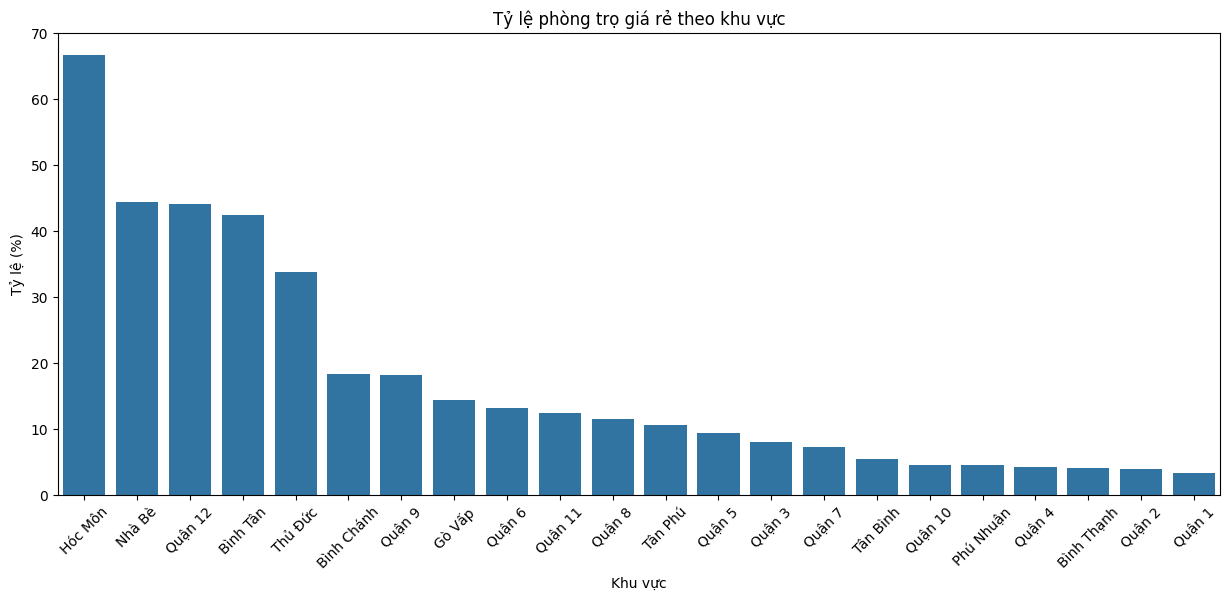

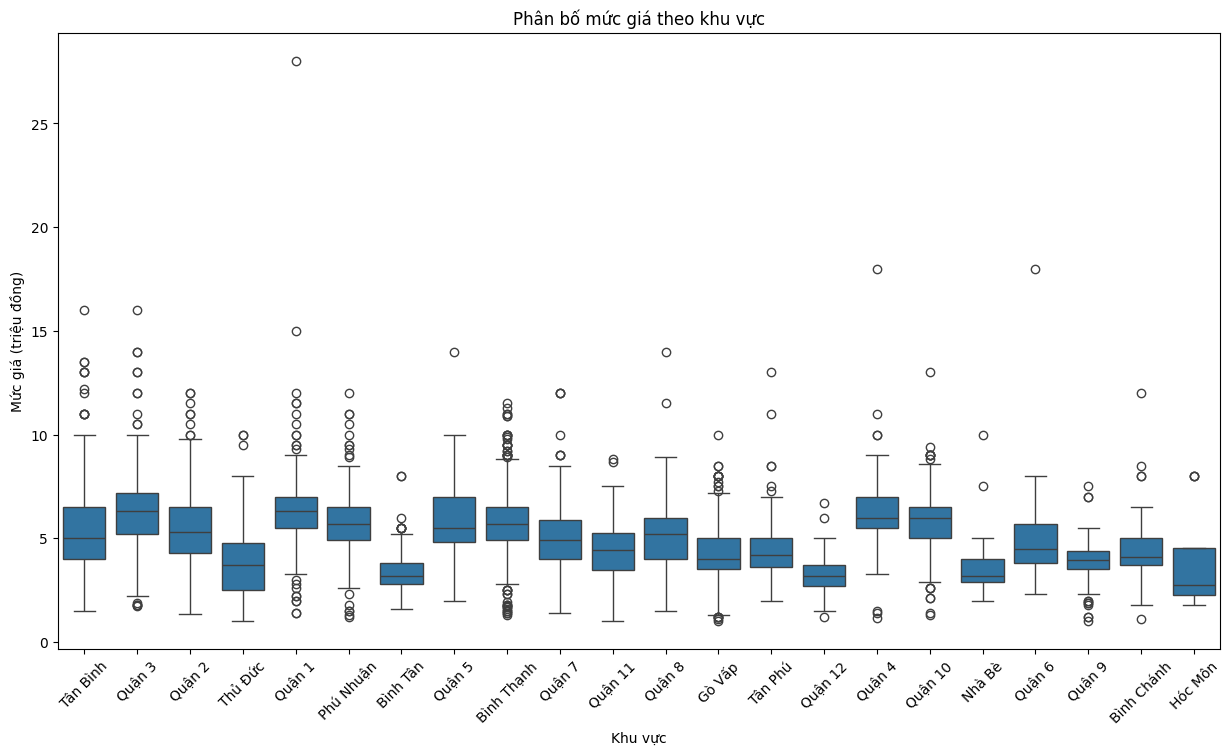

In [14]:
# Biểu đồ 1: Tỷ lệ phòng trọ giá rẻ theo khu vực
plt.figure(figsize=(15, 6))
ty_le_phong_tro_gia_re = ty_le_phong_tro_gia_re.sort_values(ascending=False)
sns.barplot(x=ty_le_phong_tro_gia_re.index, y=ty_le_phong_tro_gia_re.values)
plt.title("Tỷ lệ phòng trọ giá rẻ theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45)
plt.show()

# Biểu đồ 2: Phân bố giá của tất cả các phòng trọ theo khu vực
plt.figure(figsize=(15, 8))
sns.boxplot(x='Địa chỉ', y='Mức giá', data=data_Q1)
plt.title("Phân bố mức giá theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Mức giá (triệu đồng)")
plt.xticks(rotation=45)
plt.show()

Từ biều đồ chúng ta có thể thấy:
- Cho thấy rõ sự phân hóa về tỷ lệ phòng trọ giá rẻ giữa các khu vực.
- Các quận ngoại thành thường có tỷ lệ phòng trọ giá rẻ cao hơn so với các quận nội thành.
- Qua biểu đồ boxplot, chúng ta có thể thấy mức giá trung bình, khoảng biến thiên, giá trị ngoại lệ của giá thuê tại mỗi khu vực.
##### Kết luận:
- Xác định các khu vực có nhiều phòng trọ giá rẻ:
    + Các khu vực càng xa nội thành thì tỷ lệ phòng trọ giá rẻ càng cao: Hóc Môn, Nhà Bè, Quận 12, Bình Tân, Thủ Đức là những khu vực có tỷ lệ phòng trọ giá rẻ cao nhất. Điều này được thể hiện rõ ràng trên cả hai biểu đồ. Các khu vực này tập trung đông đảo người lao động phổ thông, công nhân các khu công nghiệp, sinh viên các trường đại học, cao đẳng ở xa trung tâm. Đây là nhóm người có thu nhập trung bình hoặc thấp, nhu cầu tìm kiếm phòng trọ giá rẻ là rất lớn.
    + Các khu vực nội thành: Quận 1, Quận Bình Thạnh, Quận 2 có tỷ lệ phòng trọ giá rẻ thấp nhất. Các quận này đã phát triển từ lâu, mật độ xây dựng rất cao, quỹ đất dành cho xây dựng nhà ở, đặc biệt là các khu nhà trọ bình dân, rất hạn chế. Điều này làm giảm nguồn cung phòng trọ giá rẻ, đẩy giá thuê lên cao.
- Phân bố giá cả:
    + Giá cả trung bình: Các khu vực ngoại thành TP HCM thường có mức giá trung bình thấp hơn so với các khu vực nội thành. Điều này được thể hiện rõ qua biểu đồ boxplot.
    + Có một số điểm dữ liệu nằm xa so với các điểm dữ liệu còn lại (outliers). Điều này cho thấy có một số phòng trọ có giá thuê rất cao hoặc rất thấp so với mặt bằng chung của khu vực. Các điểm dữ liệu ngoại lệ này có thể do nhiều nguyên nhân như: phòng trọ có vị trí đặc biệt đẹp, có tiện ích cao cấp, hoặc ngược lại, phòng trọ có chất lượng kém, vị trí không thuận lợi.
- Kết luận tổng quan:
    + Thị trường cho thuê phòng trọ tại Thành phố Hồ Chí Minh có sự phân hóa rõ rệt giữa các khu vực. Các khu vực ngoại thành thường có nhiều lựa chọn phòng trọ giá rẻ hơn so với các khu vực nội thành. Tuy nhiên, chất lượng và tiện ích của các phòng trọ này cũng có sự khác biệt.

### 3.2 Câu hỏi 2: Tỷ lệ phòng trọ diện tích nhỏ phân bố như thế nào ở từng khu vực? Mức giá trung bình của các phòng trọ diện tích nhỏ thay đổi ra sao giữa các khu vực và so với mức giá trung bình của các phòng trọ có diện tích lớn hơn trong cùng khu vực đó?
###### [(Về trang đầu)](#content)

##### Ý nghĩa của việc trả lời câu hỏi
- Câu hỏi này giúp xác định khu vực nào tập trung nhiều phòng trọ diện tích nhỏ, từ đó hiểu rõ hơn về nhu cầu và nguồn cung loại hình phòng trọ này. Đồng thời, so sánh giá giữa phòng nhỏ và phòng lớn hơn trong cùng khu vực giúp người thuê có cái nhìn tổng quan về thị trường và chủ nhà có chiến lược giá phù hợp.
##### Phân tích hướng xử lí
- Các bước thực hiện:
    + Xác định khái niệm "phòng trọ diện tích nhỏ" (ví dụ: dưới 20m2).
    + Tính tỷ lệ phòng trọ diện tích nhỏ ở mỗi khu vực.
    + Tính mức giá trung bình của phòng trọ diện tích nhỏ và lớn hơn ở mỗi khu vực.
    + Trực quan hóa kết quả bằng biểu đồ.
- Kết quả mong đợi:
    + Xác định được các khu vực có nhiều phòng trọ diện tích nhỏ.
    + Xác định được sự chênh lệch mức giá trung bình của phòng trọ diện tích nhỏ và lớn hơn ở mỗi khu vực.

##### Tiền xử lí

In [15]:
data_Q2 = df.copy()
data_Q2['Địa chỉ'] = data_Q2['Địa chỉ'].map(mapping)

# Xác định phòng trọ diện tích nhỏ (dưới 20m2)
data_Q2['La_phong_tro_dien_tich_nho'] = (data_Q2['Diện tích'] < 20)

##### Phân tích và trả lời câu hỏi

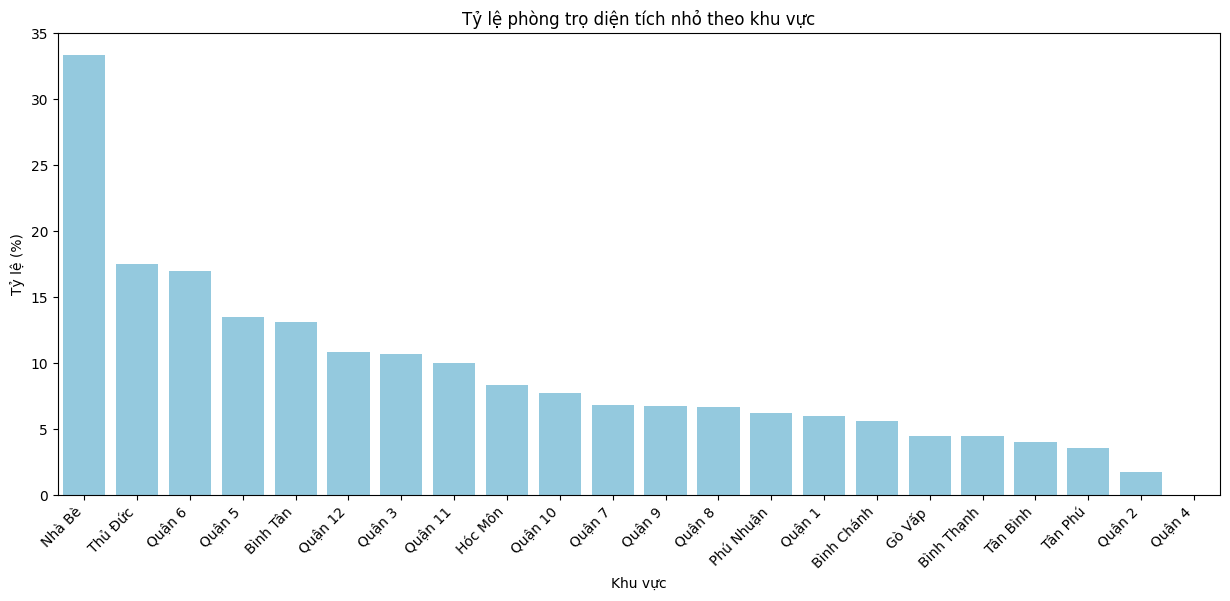

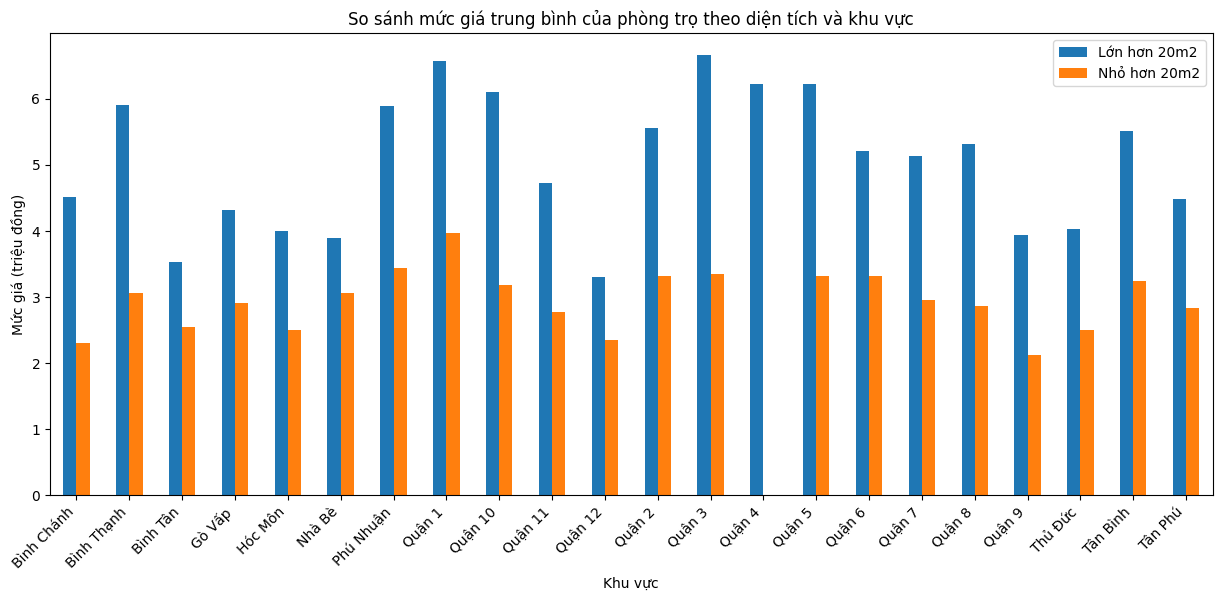

In [16]:
#Tính giá trị trung bình theo nhóm
gia_tb_theo_dien_tich = data_Q2.groupby(['Địa chỉ','La_phong_tro_dien_tich_nho'])['Mức giá'].mean().unstack()
ty_le_phong_tro_S_nho= data_Q2.groupby('Địa chỉ')['La_phong_tro_dien_tich_nho'].mean() * 100
ty_le_phong_tro_S_nho = ty_le_phong_tro_S_nho.sort_values(ascending=False)

# Biểu đồ 1: Tỷ lệ phòng trọ diện tích nhỏ theo khu vực
plt.figure(figsize=(15, 6))
ty_le_phong_tro_S_nho
sns.barplot(x=ty_le_phong_tro_S_nho.index, y=ty_le_phong_tro_S_nho.values, color='skyblue')
plt.title("Tỷ lệ phòng trọ diện tích nhỏ theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

#Biểu đồ 2: So sánh mức giá trung bình của phòng trọ diện tích nhỏ và lớn theo khu vực
gia_tb_theo_dien_tich.plot(kind='bar', figsize=(15,6))
plt.title("So sánh mức giá trung bình của phòng trọ theo diện tích và khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Mức giá (triệu đồng)")
plt.xticks(rotation=45, ha='right')
plt.legend(['Lớn hơn 20m2','Nhỏ hơn 20m2']) 
plt.show()

Từ biều đồ 1 chúng ta có thể thấy tỷ lệ phòng trọ diện tích nhỏ phân bố theo khu vực:
- Các khu vực Nhà Bè, Thủ Đức , quận 5 và quận 6 có tỷ lệ phòng trọ diện tích nhỏ cao hơn hẳn so với các khu vực khác vì:
    + Thành phố Thủ Đức và Nhà Bè: Phần lớn người thuê trọ ở đây là sinh viên, công nhân, người lao động có thu nhập thấp, ưu tiên thuê phòng có dện tích nhỏ giá rẻ. Nhu cầu thuê trọ giá rẻ, gần nơi làm việc tăng cao, dẫn đến việc các chủ nhà trọ tận dụng tối đa diện tích để xây dựng nhiều phòng, thu lợi nhuận.

    + Quận 5 và Quận 6: Đây là hai quận có lịch sử lâu đời, tập trung đông người Hoa sinh sống. Kiến trúc nhà ở ở đây thường là các nhà phố kiểu cũ, được chia nhỏ để cho thuê, tạo thành các phòng trọ có diện tích hạn chế.
- Những khu vực nội thành như Quận 2, Quận 4, Bình Thạnh, Tân Bình và Tân Phú có tỷ lệ phòng trọ diện tích nhỏ thấp bởi vì đây là các khu vực Vị trí trung tâm hoặc gần trung tâm, bên cạnh nhà trọ các quận này còn có nhiều loại hình nhà ở khác như căn hộ chung cư, nhà nguyên căn, nhà cho thuê nguyên căn... điều này tạo ra sự cạnh tranh và người thuê có nhiều sự lựa chọn hơn, ít bị phụ thuộc vào các phòng trọ nhỏ. Và điều này cũng phản ánh xu hướng các phòng trọ tại đây thường có diện tích lớn hơn do giá thuê mặt bằng cao khiến chủ nhà ưu tiên xây dựng phòng lớn hơn hoặc cho thuê mặt bằng kinh doanh.


Từ biểu đồ 2 ta có thể thấy:
- Tương tự như phòng trọ có diện tích nhỏ, đối với phòng trọ có diện tích lớn các vùng ven và ngoại thành thường có giá thấp hơn khu vực nội thành.
- Giá trung bình của phòng nhỏ chỉ bằng 50% đến 60% với phòng vừa và lớn. Thay vì thuê phòng trọ nhỏ thì ta có thể thuê phòng trọ lớn tìm kiếm bạn phòng rồi chia tiền thì sẽ tiết kiệm được chi phí lại còn có thể có một môi trường, cơ sở vật chất tốt hơn.

#### Kết luận

Qua phân tích dữ liệu, chúng ta thấy rõ sự phân hóa về tỷ lệ phòng trọ diện tích nhỏ giữa các khu vực tại Thành phố Hồ Chí Minh. Các khu vực ngoại thành và một số quận nội thành có lịch sử lâu đời thường có tỷ lệ phòng trọ diện tích nhỏ cao hơn. Điều này có thể giải thích bởi các yếu tố như:
- Quy hoạch đô thị: Các khu vực ngoại thành và các quận có lịch sử lâu đời thường chưa có quy hoạch đô thị đồng bộ, dẫn đến việc xây dựng các phòng trọ nhỏ lẻ, tự phát.
- Giá cả mặt bằng: Ở các khu vực trung tâm, giá thuê mặt bằng cao nên các chủ nhà thường ưu tiên xây dựng các phòng trọ có diện tích lớn hơn để tối ưu hóa lợi nhuận.
- Nhu cầu của người thuê: Ở các khu vực ngoại thành, người thuê thường có nhu cầu thuê phòng trọ với chi phí thấp, vì vậy phòng trọ diện tích nhỏ đáp ứng được nhu cầu này.

Ngoài ra chúng ta cũng thấy được sự chênh lệch giữa trung bình giá phòng nhỏ và phòng lớn giữa các khu vực. Điều này giúp người thuê có được sự lựa chọn tối ưu nhất có thể.

## 4. Tiện nghi - Tiện ích <a id="convenience"></a>

### 4.1. Câu hỏi 1: Khu vực nào phòng trọ có sẵn nội thất nhiều?   <a id="4-question-1"></a>
###### [(Về trang đầu)](#content)

#### Bước 1: Nhóm các phòng trọ theo khu vực (Địa chỉ) và tính tổng giá trị cột Nội thất cho mỗi khu vực

In [17]:
noi_that_theo_khu_vuc = df.groupby('Địa chỉ')['Nội thất'].sum()
noi_that_theo_khu_vuc

Địa chỉ
1     411
2     698
3     353
4     105
5     138
6      82
7     585
8     204
9      92
10    317
11     44
12    152
13    963
14    467
15    346
16    646
17    328
18    171
19    155
20    104
23     15
24     42
Name: Nội thất, dtype: int64

#### Bước 2: Sắp xếp các khu vực theo tổng giá trị Nội thất theo thứ tự giảm dần

In [18]:
noi_that_theo_khu_vuc_sorted = noi_that_theo_khu_vuc.sort_values(ascending=False)
noi_that_theo_khu_vuc_sorted

Địa chỉ
13    963
2     698
16    646
7     585
14    467
1     411
3     353
15    346
17    328
10    317
8     204
18    171
19    155
12    152
5     138
4     105
20    104
9      92
6      82
11     44
24     42
23     15
Name: Nội thất, dtype: int64

### Bước 3: Xác định khu vực đứng đầu danh sách

In [19]:
khu_vuc_nhieu_noi_that_nhat = noi_that_theo_khu_vuc_sorted.index[0]
print("Khu vực có nhiều phòng trọ có sẵn nội thất nhất:",mapping[khu_vuc_nhieu_noi_that_nhat])

Khu vực có nhiều phòng trọ có sẵn nội thất nhất: Bình Thạnh


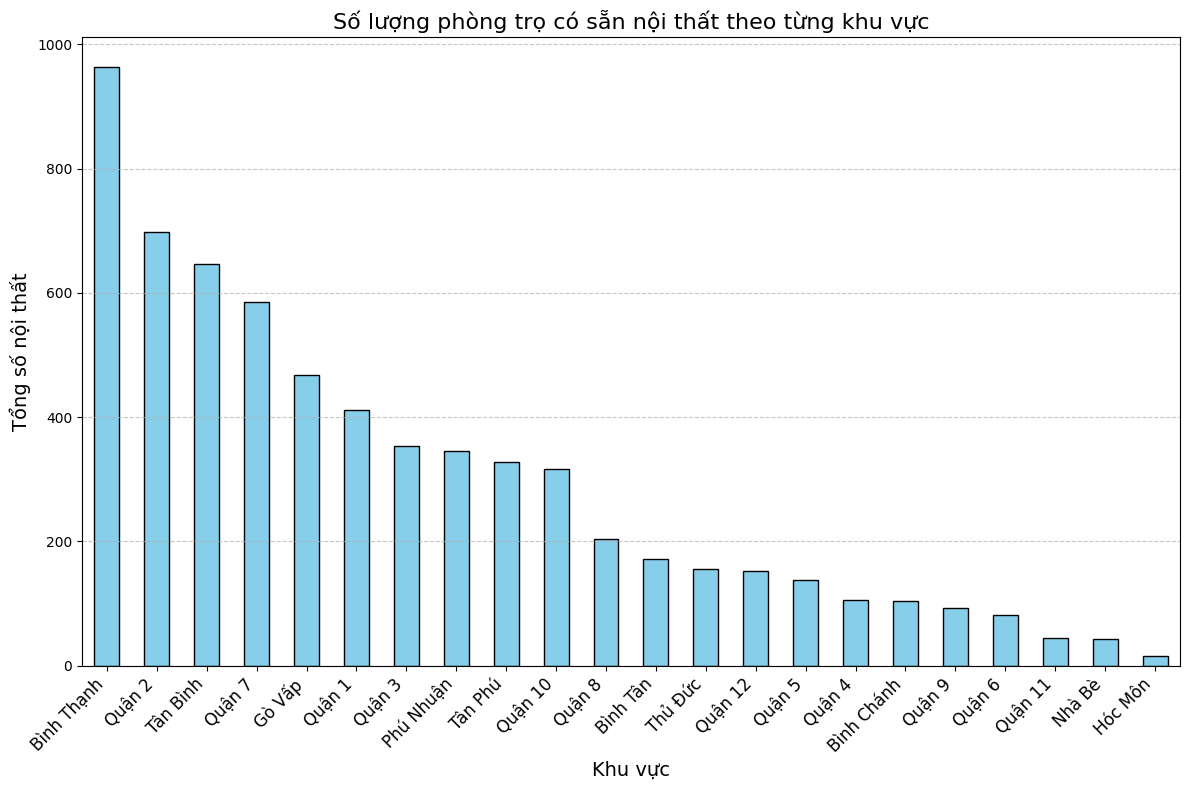

In [20]:
noi_that_theo_khu_vuc_sorted_named = noi_that_theo_khu_vuc_sorted.rename(index=mapping)

# Plot the bar chart
plt.figure(figsize=(12, 8))
noi_that_theo_khu_vuc_sorted_named.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Số lượng phòng trọ có sẵn nội thất theo từng khu vực", fontsize=16)
plt.xlabel("Khu vực", fontsize=14)
plt.ylabel("Tổng số nội thất", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### Phân tích số lượng phòng trọ có sẵn nội thất theo khu vực tại TP.HCM

##### Tổng quan
- Biểu đồ thể hiện số lượng phòng trọ có sẵn nội thất phân bố theo các quận/huyện tại TP.HCM
- Dữ liệu được biểu diễn dưới dạng biểu đồ cột, sắp xếp theo thứ tự giảm dần

##### Các điểm chính

1. Phân bố không đồng đều:
- Bình Thạnh dẫn đầu với khoảng 950 phòng trọ có nội thất
- Top 3 khu vực có nhiều phòng trọ nhất: Bình Thạnh, Quận 2, Tân Bình
- Các khu vực có ít phòng trọ nhất: Hóc Môn, Nhà Bè, Quận 11 (<100 phòng)

2. Phân nhóm khu vực:
- Nhóm cao (>600): Bình Thạnh, Quận 2, Tân Bình
- Nhóm trung bình (300-600): Quận 7, Gò Vấp, Quận 1, Quận 3, Phú Nhuận
- Nhóm thấp (<300): Các quận/huyện còn lại

3. Xu hướng:
- Các quận trung tâm và các quận phát triển mới có số lượng phòng trọ cao
- Các quận/huyện ngoại thành có số lượng phòng trọ thấp hơn đáng kể

##### Ý nghĩa

1. Cung cầu:
- Phản ánh nhu cầu nhà ở tại các khu vực trung tâm và phát triển mới
- Cho thấy xu hướng đầu tư căn hộ dịch vụ tập trung tại các khu vực phát triển

2. Quy hoạch:
- Thể hiện sự phát triển không đồng đều giữa các khu vực
- Cơ hội phát triển cho các khu vực có số lượng thấp

### 4.2. Câu hỏi 2: Số lượng phòng nhóm theo nội thất phân bố như thế nào?  <a id="4-question-2"></a>
###### [(Về trang đầu)](#content)

#### Bước 1: Đếm số lượng phòng theo từng loại nội thất.

In [21]:
df['Nội thất (Mô tả)'] = df['Nội thất'].map(mapping_noi_that)

so_luong_theo_noi_that = df['Nội thất (Mô tả)'].value_counts()
so_luong_theo_noi_that

Nội thất (Mô tả)
Đầy đủ     2906
Không      1119
Cơ bản      558
Cao cấp      16
Name: count, dtype: int64

#### Bước 2: Vẽ biểu đồ trực quan

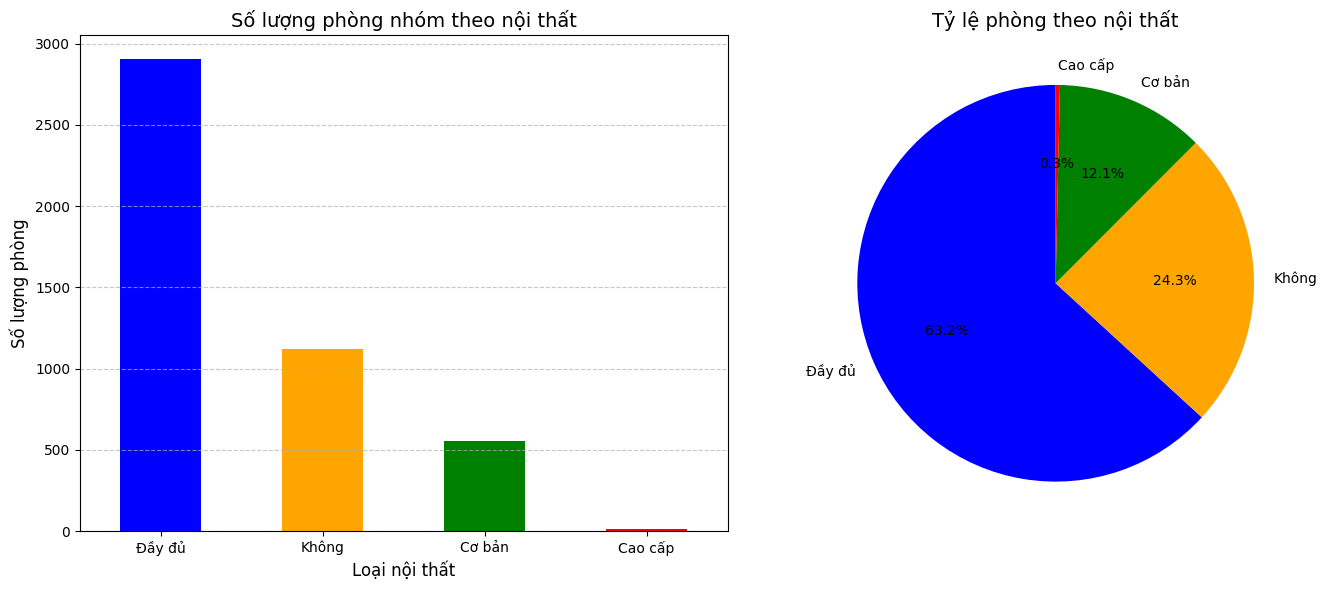

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

so_luong_theo_noi_that.plot(
    kind='bar', 
    color=['blue', 'orange', 'green', 'red'], 
    ax=axes[0]
)
axes[0].set_title("Số lượng phòng nhóm theo nội thất", fontsize=14)
axes[0].set_xlabel("Loại nội thất", fontsize=12)
axes[0].set_ylabel("Số lượng phòng", fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

so_luong_theo_noi_that.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['blue', 'orange', 'green', 'red'], 
    startangle=90, 
    ax=axes[1]
)
axes[1].set_title("Tỷ lệ phòng theo nội thất", fontsize=14)
axes[1].set_ylabel("")  

plt.tight_layout()

plt.show()

#### Phân tích số lượng và tỷ lệ phòng trọ theo mức độ nội thất tại TP.HCM

##### Tổng quan
- Dữ liệu được thể hiện qua 2 biểu đồ: biểu đồ cột về số lượng và biểu đồ tròn về tỷ lệ
- Phân loại nội thất thành 4 mức độ: đầy đủ, không có, cơ bản, và cao cấp

##### Phân tích

1. Số lượng phòng theo nội thất:
- Phòng có nội thất đầy đủ: khoảng 2,900 phòng (chiếm 63.2%)
- Phòng không có nội thất: khoảng 1,100 phòng (chiếm 24.3%)
- Phòng có nội thất cơ bản: khoảng 550 phòng (chiếm 12.1%)
- Phòng có nội thất cao cấp: số lượng rất ít (chiếm 0.3%)

2. Xu hướng thị trường:
- Đa số phòng trọ (>60%) được trang bị nội thất đầy đủ
- Gần 1/4 số phòng không có nội thất, cho thấy vẫn có nhu cầu về phòng trống
- Phân khúc cao cấp chiếm tỷ lệ nhỏ, phản ánh thị trường chủ yếu phục vụ phân khúc bình dân

##### Nhận xét

1. Về thị hiếu:
- Người thuê ưa chuộng phòng có nội thất đầy đủ
- Thị trường phòng trọ cao cấp còn khá hạn chế
- Vẫn tồn tại nhu cầu về phòng không nội thất (có thể do giá rẻ hơn)

2. Về đầu tư:
- Chủ đầu tư có xu hướng trang bị nội thất đầy đủ để tăng khả năng cho thuê
- Phân khúc cao cấp còn nhiều dư địa phát triển

### 4.3. Câu hỏi 3: Phần trăm số lượng phòng có từ 2 phòng ngủ?   <a id="4-question-3"></a>
###### [(Về trang đầu)](#content)

#### Bước 1: Đếm số lượng phòng trọ có `Số phòng ngủ >= 2`

In [23]:
so_phong_tu_2_phong_ngu = df[df['Số phòng ngủ'] >= 2].shape[0]
print("Số lượng phòng trọ có từ 2 phòng ngủ trở lên:", so_phong_tu_2_phong_ngu)

Số lượng phòng trọ có từ 2 phòng ngủ trở lên: 163


#### Bước 2: Tính tổng số lượng phòng trọ

In [24]:
tong_so_phong_tro = df.shape[0]
print("Tổng số lượng phòng trọ:", tong_so_phong_tro)

Tổng số lượng phòng trọ: 4599


#### Bước 3: Tính tỷ lệ phần trăm

In [25]:
phan_tram = (so_phong_tu_2_phong_ngu / tong_so_phong_tro) * 100
print(f"Phần trăm số lượng phòng có từ 2 phòng ngủ: {phan_tram:.2f}%")

Phần trăm số lượng phòng có từ 2 phòng ngủ: 3.54%


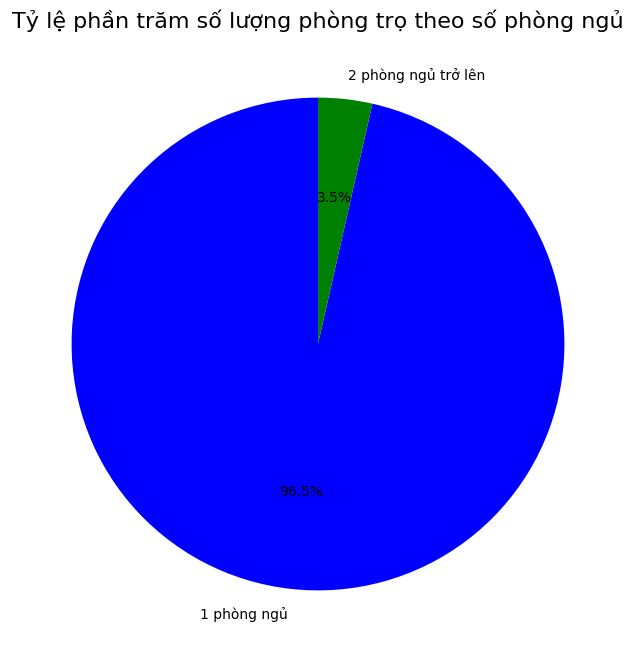

In [26]:
so_phong_tro_1 = df[df['Số phòng ngủ'] == 1].shape[0]
so_phong_tro_2_or_more = df[df['Số phòng ngủ'] >= 2].shape[0]

labels = ['1 phòng ngủ', '2 phòng ngủ trở lên']
values = [so_phong_tro_1, so_phong_tro_2_or_more]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])

plt.title("Tỷ lệ phần trăm số lượng phòng trọ theo số phòng ngủ", fontsize=16)

plt.show()

#### Trả lời
Phần trăm số lượng phòng có từ 2 phòng ngủ là `3.5%`, các phòng còn lại đều chỉ có `1` phòng ngủ, ta tiến hành phân tích xem các khu vực nào chứa nhiều phòng có từ 2 phòng ngủ trở lên

#### Phân tích: Các phòng có từ 2 phòng ngủ trở lên tập trung ở khu vực nào?

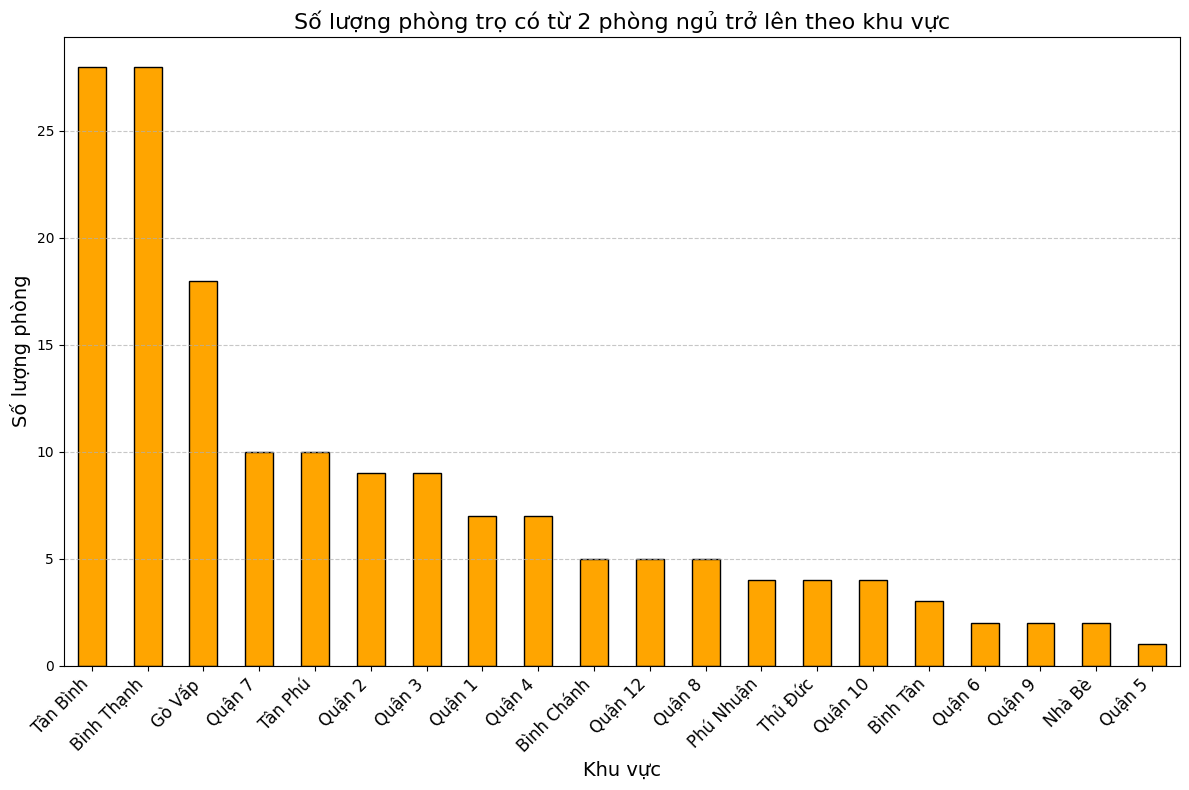

In [27]:
phong_tro_tu_2_phong_ngu = df[df['Số phòng ngủ'] >= 2]
phong_tro_theo_khu_vuc = phong_tro_tu_2_phong_ngu.groupby('Địa chỉ').size()
phong_tro_theo_khu_vuc_sorted = phong_tro_theo_khu_vuc.sort_values(ascending=False)
phong_tro_theo_khu_vuc_sorted_named = phong_tro_theo_khu_vuc_sorted.rename(index=mapping)
plt.figure(figsize=(12, 8))
phong_tro_theo_khu_vuc_sorted_named.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Số lượng phòng trọ có từ 2 phòng ngủ trở lên theo khu vực", fontsize=16)
plt.xlabel("Khu vực", fontsize=14)
plt.ylabel("Số lượng phòng", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



#### Phân tích số lượng phòng trọ từ 2 phòng ngủ trở lên theo khu vực tại TP.HCM

##### Phân bố địa lý
- Khu vực có nhiều phòng trọ nhất là Tân Bình và Bình Thạnh (khoảng 28 phòng mỗi quận)
- Top 3 khu vực dẫn đầu bao gồm: Tân Bình, Bình Thạnh và Gò Vấp (17-28 phòng)
- Các quận trung tâm như Quận 1, Quận 3 có số lượng phòng trọ ở mức trung bình (7-9 phòng)
- Các quận ngoại thành như Quận 9, Nhà Bè có ít phòng trọ nhất (2-3 phòng)

##### Phân tích
1. Tập trung cao ở khu vực phát triển:
   - Các quận có nhiều phòng trọ thường là những khu vực phát triển sớm, gần trung tâm
   - Có hệ thống hạ tầng và tiện ích đầy đủ
   
2. Phân bố không đồng đều:
   - Chênh lệch rõ rệt giữa các khu vực (28 phòng vs 1 phòng)
   - Khoảng 60% tổng số phòng trọ tập trung ở 5 quận đầu tiên

3. Tiềm năng phát triển:
   - Các quận có số lượng phòng trọ thấp có thể là cơ hội đầu tư trong tương lai
   - Đặc biệt là các khu vực đang phát triển như Quận 9, Nhà Bè
